In [61]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
from classes.constantsmd import *
from classes.gridmd import *
from classes.functionsmd import *
sy.init_printing()

In [62]:
sigma, r , epsilon, V, f= sy.symbols("sigma r epsilon V f")
x1, x2, y1, y2, z1, z2 = sy.symbols("x1 x2 y1 y2 z1 z2")

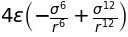

In [63]:
V=4*epsilon( (sigma/r)**12 - (sigma/r)**6 )
V

In [64]:
dV_dr=sy.diff(V,r)
F=-dV_dr
F

   ⎛   6       12⎞                           
   ⎜6⋅σ    12⋅σ  ⎟ ⎛ d        ⎞│      6    12
-4⋅⎜──── - ──────⎟⋅⎜───(ε(ξ₁))⎟│     σ    σ  
   ⎜  7      13  ⎟ ⎝dξ₁       ⎠│ξ₁=- ── + ───
   ⎝ r      r    ⎠                    6    12
                                     r    r  

In [65]:
F.subs({sigma/r:f})

   ⎛      12      6⎞                         
   ⎜  12⋅f     6⋅f ⎟ ⎛ d        ⎞│           
-4⋅⎜- ────── + ────⎟⋅⎜───(ε(ξ₁))⎟│    12    6
   ⎝    r       r  ⎠ ⎝dξ₁       ⎠│ξ₁=f   - f 

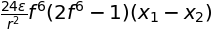

In [66]:
Fxij = 24*epsilon*f**6*(2*f**6 - 1)/r*(x1-x2)/r
sy.simplify(Fxij)

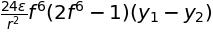

In [67]:
Fyij = 24*epsilon*f**6*(2*f**6 - 1)/r*(y1-y2)/r
sy.simplify(Fyij)

In [68]:
ls=list(sy.simplify(sy.solve(dV_dr,sigma)))
ls[0:3]

$r=\sqrt{\left(- x_{1} + x_{2}\right)^{2} + \left(- y_{1} + y_{2}\right)^{2} + \left(- z_{1} + z_{2}\right)^{2}}$

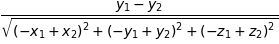

In [79]:
sy.diff(sy.sqrt((x2-x1)**2 +(y2-y1)**2 +(z2-z1)**2 ),y1)

In [69]:
ial = 1.02e-10
sig = 2**(5/6 * ial)/2

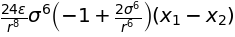

In [70]:
(Fxij.subs({f:sigma/r}))

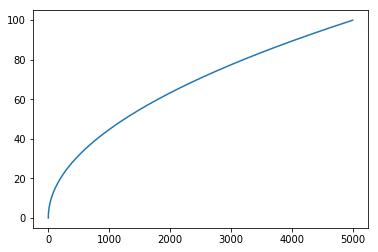

In [71]:

N = 1000
dt  = 0.1 
x = np.zeros(N)
v = np.zeros(N)
t = np.arange(0,(N+0.5)*dt, dt)
a = np.ones(N)*1.0  # initial condition
x[[0,1]] = 1
v[1] = v[0]+a[0]*dt

for i in range (1,N-1):
    x[i+1] = x[i]+v[i]*dt+(a[i]*(dt**2)*0.5)
    v[i+1] = v[i] + a[i]*dt

plt.plot(x,v)

In [72]:
rg = np.array([-1,0,1])
for i in rg:
    for j in rg:
        for k in rg:
            if (i==j and j==k):
                pass
            else:
                print(i,j,k)

-1 -1 0
-1 -1 1
-1 0 -1
-1 0 0
-1 0 1
-1 1 -1
-1 1 0
-1 1 1
0 -1 -1
0 -1 0
0 -1 1
0 0 -1
0 0 1
0 1 -1
0 1 0
0 1 1
1 -1 -1
1 -1 0
1 -1 1
1 0 -1
1 0 0
1 0 1
1 1 -1
1 1 0


In [73]:
a=1;b=1;c=0


In [74]:
if (a==1):
    print("a=1")
if (b==1):
    print("b=1")
if (c==1):
    print("c=1")
else:
    print("else")

a=1
b=1
else


In [75]:
avagadro = 6.023e23
ial = 4.04e-10 #interatomic length
epsilon = 0.5* 1.6e-19 #1.5 #dummy value
sigma = 2.85e-10 #dummy value
vel = 1000 #velocity per step
acc = 0 #acceleration
ts = 5e-9 #timestep ex: 0.005 nano seconds as 0.005e-9
N_steps = 10

In [76]:
x1, x2, x3 = xyz_grid[0][0][0][0], xyz_grid[1][0][0][0], xyz_grid[2][0][0][0]

TypeError: 'function' object is not subscriptable

In [ ]:
vpos = empty(N_steps)
old = x1
for i in range(N_steps-1):
    #print(verlet_pos(old,i*ts,ts,acc),"\n")
    acc = forceLJ(vpos[i+1]-vpos[i],vpos[i],vpos[i+1])/avagadro
    vpos[i]=verlet_pos(old,i*ts,ts,acc)
    old = vpos[i]
    
    print(vpos[i],'\t',forceLJ(vpos[i+1]-vpos[i],vpos[i],vpos[i+1])/avagadro)
plot(range(N_steps),vpos)

In [ ]:
n=100
ls=np.empty(n)
c = 0
for i in range(n):
    #print(verlet_acc(c,0,0.1,i*ial))
    ls[i]=verlet_acc(c,0,0.1,i*ial)
plt.plot(range(100),ls)

In [81]:
import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

In [10]:
def pw(io, ar, i, n):
    sol = -io+(ar* (  ((1+i)**n) -1 ) / (i*((1+i)**n)) )
    return sol

In [15]:
print(pw(1000000, 400000,.15,15)/100000,pw(2500000,1000000,.15,12)/100000,pw(2000000,800000, .15,16)/100000)

13.389480394524359 29.206189987555604 27.633878946998884
